
<div class="alert alert-block alert-warning">
<b>Important:</b> Pour avancer d'étape en étape, il suffit de cliquer sur la petite flèche "play" pour lancer le tracé codé dans une case.
</div>



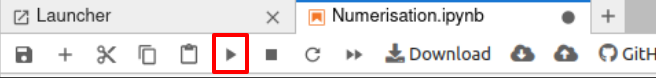

<div class="alert alert-block alert-info">
Il n'est pas nécessaire de lire les blocs de code.
</div>


In [1]:
%pip install matplotlib
%pip install ipympl
%pip install pydub
%pip install scipy

%matplotlib ipympl
from ipywidgets import interactive,interact
import IPython.display as ipd
import matplotlib.pyplot as plt
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import numpy as np
import locale
from pydub import AudioSegment
from scipy.fft import fft, fftfreq, fftshift
import warnings
warnings.filterwarnings('ignore')
print("Bibliothèques importées avec succès")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Bibliothèques importées avec succès



# La numérisation et ses effets


Pour convertir un signal analogique (continu) en un signal numérique (discret, quantifié), il faut **discrétiser** le signal analogique **en temps** et **en amplitude**.



Pour la discrétisation en temps, on parle d'échantillonnage : 

<div class="alert alert-block alert-info">
<b>Définition :</b>
L'échantillonnage consiste à ne conserver que certains points du signal analogique, prélevés périodiquement. 
</div>

Si on zoomait à l'infini sur un signal d'une seconde, on pourrait enregistrer une infinité de points, pour éviter cela on enregistre les échantillons à intervalle de temps constant, intervalle qu'on appelle la **période d'échantillonnage** $T_e$. On parle aussi de **fréquence d'échantillonnage** $f_e$, avec bien sûr $f_e = \frac{1}{T_e}$.


Enfin, toutes ces valeurs échantillonnées sont en nombre fini, certes, mais ont potentiellement un nombre infini de décimales. On les arrondit donc en ne les enregistrant que sur un nombre fini de bits, c'est la quantification, sur laquelle on reviendra dans un second temps.

Commençons par la discrétisation temporelle, l'échantillonnage. En compilant le bloc suivant, vous pourrez faire varier la fréquence d'échantillonnage du graphique. 



In [2]:
plt.rcParams.update({'font.size': 18})
#locale.setlocale(locale.LC_ALL, '')
#plt.rcParams['axes.formatter.use_locale'] = True


Tmin = 0
Tmax = 0.02
points = 1000
freq = 100


def sample2(signal,temps,f_ech,bit_qt):
  signal_max = np.max(signal)
  signal_min = np.min(signal)
  step = (signal_max-signal_min)/(2**bit_qt)

  numb_avg_points = np.ceil((len(temps)/(temps[-1]-temps[0]))*1/f_ech)
  avg = [signal[0]]
  signech = []
  lastavg = 0
  for index in range(1,len(signal)):
    avg.append(signal[index])
    if len(avg) < numb_avg_points :
      pass
    else :
      lastavg = avg[0]
      for i in range(len(avg)):
        signech.append(lastavg)
      avg = []

  lastavg = np.mean(avg)
  for i in range(len(avg)):
        signech.append(lastavg)

  #signal_sample = [((point-signal_min)//step)*step+step/2+signal_min for point in signech]  #fais gaffe, il faudra faire la quantification après pour pas les perdre
  signal_sample = signech
  return(signal_sample)


def f(f_echantillonnage):

    fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(10,5))
    bit_qt = 64

    x = np.linspace(Tmin, Tmax,points)
    signal = np.sin(2*np.pi*x*freq)

    axs[0].plot(x*1000, signal ,color = 'black',linewidth = 2,linestyle = "dashed",alpha = 0.5,label = "signal initial")

    signalech = sample2(signal,x,f_echantillonnage,bit_qt)

    tech = np.linspace(Tmin,Tmax,int((Tmax-Tmin)*f_echantillonnage)+1) #pb avec le step ici -> asservi au fenêtrage temporel
    axs[0].scatter(tech*1000, np.sin(2*np.pi*tech*freq) ,color = 'red',linewidth = 2,label = "échantillonnage")

    axs[0].set_ylabel("Amplitude (V)")
    axs[0].set_xlabel("Temps (ms)")
    #ax.set_title("Enregistrement")
    """
    axs[0].grid(which='major', color='#DDDDDD', linewidth=2)
    axs[0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=2)
    axs[0].minorticks_on()"""
    axs[0].legend(loc="upper right")




    axs[1].plot(x*1000, signal ,color = 'black',linewidth = 2,linestyle = "dashed",alpha = 0.5,label = "signal initial")


    axs[1].scatter(tech*1000, np.sin(2*np.pi*tech*freq) ,color = 'red',linewidth = 2)

    minloc,maxloc=(np.min(signal),np.max(signal))
    for line in range(len(tech)-1):
      axs[0].plot((tech[line]*1000,tech[line]*1000),(minloc,maxloc),color = 'black',linewidth = 1,linestyle="dashed",alpha = 0.5)

      if line ==0 :
        axs[1].plot((tech[line]*1000,tech[line]*1000+1000/f_echantillonnage),(np.sin(2*np.pi*tech[line]*freq),np.sin(2*np.pi*tech[line]*freq)),color = 'red',linewidth = 2,label="signal échantillonné")
      else :
        axs[1].plot((tech[line]*1000,tech[line]*1000+1000/f_echantillonnage),(np.sin(2*np.pi*tech[line]*freq),np.sin(2*np.pi*tech[line]*freq)),color = 'red',linewidth = 2)
        axs[1].plot((tech[line]*1000,tech[line]*1000),(np.sin(2*np.pi*tech[line-1]*freq),np.sin(2*np.pi*tech[line]*freq)),color = 'red',linewidth = 2)


    axs[1].set_ylabel("Amplitude (V)")
    axs[1].set_xlabel("Temps (ms)")
    axs[0].set_title("Fréquence d'échantillonnage : {} Hz".format(f_echantillonnage))

    axs[1].legend(loc="upper right")
    plt.show()


interactive_plot = interactive(f, f_echantillonnage=(100, 2000,100))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot



interactive(children=(IntSlider(value=1000, description='f_echantillonnage', max=2000, min=100, step=100), Out…

Comme on l'a dit, ces valeurs échantillonnées pourraient être décrites avec une infinité de décimales et donc toujours prendre un espace de stockage infini. On restreint donc les valeurs que peut prendre un signal à un nombre fini de paliers.

Par exemple, si on code la valeur d'un échantillon sur 3 bits, il y aura donc $2^{3}=8$ paliers possibles (000 001 010 011 100 101 110 111). "Arrondir" les valeurs échantillonnées pour les stocker, c'est ce qu'on appelle la quantification.

> On sait donc aussi que pour stocker l'information il faudra $3f_e$ bits par seconde de fichier à enregistrer.


<div class="alert alert-block alert-info">
<b>Définition :</b> La quantification consiste à limiter les valeurs d'amplitude que peut prendre un signal à un nombre fini de paliers.
</div>

Sur le graphique ci-dessous, vous pouvez modifier à la fois la fréquence d'échantillonnage $f_e$ et le nombre de bits de quantification $N$.

In [3]:
Tmin = 0
Tmax = 0.02
points = 1000
freq = 100


def sample(signal,temps,f_ech,bit_qt):
  signal_max = np.max(signal)
  signal_min = np.min(signal)
  step = (signal_max-signal_min)/(2**bit_qt)
  #signal_sample = [((point-signal_min)//step)*step+signal_min for point in signal]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement

  numb_avg_points = np.ceil((len(temps)/(temps[-1]-temps[0]))*1/f_ech)
  avg = [signal[0]]
  signech = []
  lastavg = 0
  for index in range(1,len(signal)):
    avg.append(signal[index])
    if len(avg) < numb_avg_points :
      pass
    else :
      lastavg = np.mean(avg)
      for i in range(len(avg)):
        signech.append(lastavg)
      avg = []

  lastavg = np.mean(avg)
  for i in range(len(avg)):
        signech.append(lastavg)

  signal_sample = [((point-signal_min)//step)*step+step/2+signal_min for point in signech]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement
  #attention c'est une qtfication centrée

  return(signal_sample)


def f(freq_ech,bit_qt):


    fig,ax = plt.subplots(figsize=(10,5))



    x = np.linspace(Tmin, Tmax,points)
    signal = np.sin(2*np.pi*x*freq)

    ax.plot(x*1000, signal ,color = 'black',linewidth = 2,linestyle = "dashed",alpha = 0.5)

    signalech = sample(signal,x,freq_ech,bit_qt)

    ax.plot(x*1000, signalech ,color = 'black',linewidth = 2)

    ax.set_ylabel("Amplitude (V)")
    ax.set_xlabel("Temps (ms)")

    ax.set_title("Quantification")

    """
    ax.grid(which='major', color='#DDDDDD', linewidth=2)

    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=2)

    ax.minorticks_on()"""

    minx,maxx = (np.min(x)*1000,np.max(x)*1000)
    (sign_min,sign_max) = (np.min(signal),np.max(signal))
    steploc = (sign_max-sign_min)/(2**bit_qt)
    ax.plot((minx,maxx),(sign_min+steploc/2,sign_min+steploc/2),color = 'black',linewidth = 1,linestyle="dashed",alpha = 0.05+np.max(((0.5-(2**bit_qt)/256),0)),label = "niveaux de quantification")
    for quantiline in range(1,2**bit_qt):
        ax.plot((minx,maxx),(sign_min+steploc*quantiline+steploc/2,sign_min+steploc*quantiline+steploc/2),color = 'black',linewidth = 1,linestyle="dashed",alpha = 0.05+np.max(((0.5-(2**bit_qt)/256),0)))

    ax.legend(loc = 'upper right')

    plt.show()


interactive_plot = interactive(f, freq_ech=(100, 20000,100),bit_qt=(1,8,1))
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

#ajouter la possibilité d'écouter, de jouer des morceaux pré-enregistrés, et d'écouter l'effet de la compression



interactive(children=(IntSlider(value=10000, description='freq_ech', max=20000, min=100, step=100), IntSlider(…

Une manière simple de se représenter les effets de la numérisation est, sur des signaux audio, d'écouter l'impact de la fréquence d'échantillonnage et du nombre de bits de quantification. Dans le code audible et interactif qui suit, cocher la case "signal initial" permet de retrouver le signal initial (numérisé avec $f_e$ et $N$ très élevés) pour pouvoir comparer.

In [4]:
#debug
#sound = []
verbose = False
sr = 22050 # sample rate encodage mp3

freq = 300
Tmin = 0
Tmax = 2/freq
points = int((Tmax-Tmin)*sr)

#freq_echan = 50000
#bit_qt = 32

def sampleloc(signal,temps,f_echloc,bit_qtloc):
    signal_max = float(np.max(np.asarray(signal)))
    signal_min = float(np.min(np.asarray(signal)))
    if verbose :
      print(signal_max,signal_min,type(signal_max),signal_max-signal_min)
    step = (signal_max-signal_min)/(2**bit_qtloc)
    if verbose :
      print("bitqt_loc is {} and step is {}".format(bit_qtloc,step))
    #signal_sample = [((point-signal_min)//step)*step+signal_min for point in signal]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement

    numb_avg_points = np.ceil((len(temps)/(temps[-1]-temps[0]))*1/f_echloc)
    #print(numb_avg_points)
    avg = [signal[0]]
    signech = []
    lastavg = 0
    for index in range(1,len(signal)):
        avg.append(signal[index])
        if len(avg) < numb_avg_points :
            pass
        else :
            lastavg = np.mean(avg)
            for i in range(len(avg)):
                signech.append(lastavg)
            avg = []

    lastavg = np.mean(avg)
    for i in range(len(avg)):
        signech.append(lastavg)

    signal_sample = [((point-signal_min)//step)*step+step/2+signal_min for point in signech]  #fais gaffe, il faudra faire la quantification après l'échantillonnage normalement
    #attention c'est une qtfication centrée

    return(signal_sample)


def Soundrand(son,freq_echan,bit_qty,signal_initial = False):
    #global sound  #??? -> connerie sans nom sur un notebook ffs

    if son == "son pur":
      x = np.linspace(Tmin, Tmax,points)
      signal = np.sin(2*np.pi*x*freq)


      if signal_initial :
        ysound = list(signal[1:])*500

        sound = ipd.Audio(ysound, rate=sr, autoplay=True)
      else :
        #print(len(signal))
        signalech = sampleloc(signal,x,freq_echan,bit_qty)
        #print(len(signalech))
        ysound = list(signalech[1:])*500
        #print(len(ysound))

        sound = ipd.Audio(ysound, rate=sr, autoplay=True)



    elif son == "mario":
      duree=13

      audio_file = AudioSegment.from_file("mario2(2).wav") #éviter le ffmpeg à tout prix pour un usage sur un serveur déporté
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples)
      if signal_initial :
        ysound = list(samples[::2]) #ffs spaghetti ...
        sr2 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr2, autoplay=True)

      else :
        signal = samples[::2]
        xm = np.linspace(0, duree,np.shape(signal)[0])
        signalech = sampleloc(signal,xm,freq_echan,bit_qty) #tentative d'isolation des variables inter-blocs
        ysound = list(signalech)*1
        sr3 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr3, autoplay=True)

    else :
      duree=18

      audio_file = AudioSegment.from_file("doom(2).wav")
      samples = audio_file.get_array_of_samples()
      samples = np.array(samples)
      if signal_initial :
        ysound = list(samples[::2])
        sr2 = len(ysound)/duree
        sound = ipd.Audio(ysound, rate=sr2, autoplay=True)

      else :
        signal = samples[::2]
        xd = np.linspace(0, duree,np.shape(signal)[0])
        #print(np.shape(signal)[0])
        signalech = sampleloc(signal,xd,freq_echan,bit_qty)
        if verbose :
          print(signalech[20000:20020],bit_qty)
        ysoundd = list(signalech)*1
        sr3 = len(ysoundd)/duree
        sound = ipd.Audio(ysoundd, rate=sr3, autoplay=True)


    if signal_initial == False :
        print("Fréquence d'échantillonnage : {} Hz et quantification sur {} bits".format(freq_echan,bit_qty))
    else :
        print("Fréquence d'échantillonnage : 44100 Hz et quantification sur 32 bits".format(freq_echan,bit_qty))
    return sound




interactive_plot = interact(Soundrand, son =["son pur","mario","doom"],freq_echan=(1000, 20000,1000),bit_qty=(2,10,1),son_initial=False)



interactive_plot

interactive(children=(Dropdown(description='son', options=('son pur', 'mario', 'doom'), value='son pur'), IntS…

<function __main__.Soundrand(son, freq_echan, bit_qty, signal_initial=False)>

Malheureusement, en sciences on n'a pas tout le temps la possibilité d'avoir $f_e$ aussi élevée qu'on le souhaite, et la perte d'information peut vite devenir bien pire que juste esthétique. Pour s'en convaincre, faisons un bref calcul :

Échantillonner signifie ne retenir la valeur d'un signal que par intervalle de temps $T_e$. Une fonction $s(t)$ devient donc une suite : 

$s_n = s(nT_e)$ 

On a vu que l'on peut toujours décomposer ces signaux en série de Fourier, étudions donc le cas plus simple d'un signal harmonique de fréquence $f$ : 

$s_n = \rm{cos}(2\pi f n T_e)$ 

or $\rm{cos}(\pm x + 2kn\pi) = \rm{cos}(x ) \;$ avec k un entier relatif quelconque, et donc kn également un entier relatif.

donc $s_n = \rm{cos}(\pm 2\pi f n T_e + 2kn\pi) = \rm{cos}(2\pi (\pm  f n T_e + kn))$ 

et par définition $f_e T_e = 1$ d'où :

$s_n = \rm{cos}(2\pi(\pm  f n T_e + f_e T_e kn)) = \rm{cos}(2\pi T_e n \underbrace{( \pm f   + f_e  k)}_{f'})$ 

On voit donc que la fréquence $f$ du signal, une fois échantillonné, peut être confondue avec n'importe quelle fréquence $ \pm f   + f_e  k$.

Traçons, en fonction de la fréquence d'échantillonnage $f_e$ choisie, toutes ces fréquences "clones" sur un graphe : 



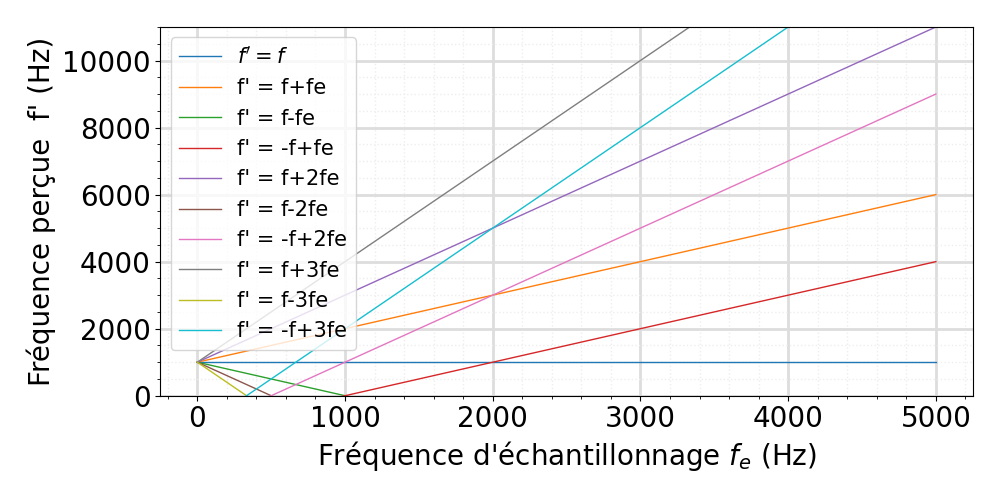

In [5]:
fig,ax = plt.subplots(figsize=(10,5))



ax.set_ylabel(r"Fréquence perçue  f' (Hz)",fontsize=20)
ax.set_xlabel(r"Fréquence d'échantillonnage $f_e$ (Hz)",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
#plt.yticks(fontsize=40)
#ax.set_ylim([-0.5, 6.5])
#ax.set_xlim([0, t[-1]])



#Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=2)
#Show the minor grid as well. Style it in very light gray as a thin,
#dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1)
#Make the minor ticks and gridlines show.
ax.minorticks_on()
ax.set_axisbelow(True) 
#ax.legend(fontsize=40)


        

f = 1000
fech = np.linspace(0,5000,100)
#fp =  np.linspace(0,5000,100)

ax.plot(fech,f*np.ones(np.shape(fech)), linestyle= 'solid',linewidth=1,label = "$f' = f$")


ax.plot(fech,f+1*fech, linestyle= 'solid',linewidth=1,label = r"f' = f+fe")
ax.plot(fech,f-1*fech, linestyle= 'solid',linewidth=1,label = r"f' = f-fe")
ax.plot(fech,-f+1*fech, linestyle= 'solid',linewidth=1,label = r"f' = -f+fe")
#ax.plot(fech,-f-k*fech, linestyle= 'solid',linewidth=1,label = r"f' = -f-fe".format(k))

ax.plot(fech,f+2*fech, linestyle= 'solid',linewidth=1,label = r"f' = f+2fe")
ax.plot(fech,f-2*fech, linestyle= 'solid',linewidth=1,label = r"f' = f-2fe")
ax.plot(fech,-f+2*fech, linestyle= 'solid',linewidth=1,label = r"f' = -f+2fe")
#ax.plot(fech,-f-k*fech, linestyle= 'solid',linewidth=1,label = r"f' = -f-fe".format(k))

ax.plot(fech,f+3*fech, linestyle= 'solid',linewidth=1,label = r"f' = f+3fe")
ax.plot(fech,f-3*fech, linestyle= 'solid',linewidth=1,label = r"f' = f-3fe")
ax.plot(fech,-f+3*fech, linestyle= 'solid',linewidth=1,label = r"f' = -f+3fe")
#ax.plot(fech,-f-k*fech, linestyle= 'solid',linewidth=1,label = r"f' = -f-fe".format(k))

ax.set_ylim([0,np.max(f+2*fech[-1])])
#ax.set_ylim([-2,105])

#ax.scatter(f_list*f0,Z0*np.asarray(Z_list)*1e-6, color = 'blue', marker = '+',s=50,label="valeurs expérimentales")
ax.legend(loc='upper left', fontsize=15)
plt.tight_layout()

plt.show()



Lorsque $f_e$ est élevée, on voit que les fréquences "clones" sont toutes à beaucoup plus haute fréquence que f. Si on se contente sur le spectre de lire la fréquence la plus faible, on lit bien $f$.

Lorsque $f_e$ est faible, on voit que beaucoup de fréquences clones aparaissent sur le spectre du signal entre 0 et f. Lorsque $f_e$ diminue, le premier pic "clone" à apparaître dans l'intervalle [0;f] apparaît pour $f_e = 2f$. Dès que $f_e < 2f$, si on se contente sur le spectre de lire la fréquence la plus faible, on ne lit plus correctement $f$.

On utilise donc cette observation pour décrire un critère qualitatif, désignant la fréquence d'échantillonnage minimale nécessaire pour échantillonner correctement un signal : 

<div class="alert alert-block alert-info">
<b>Critère de Shannon :</b> Pour échantillonner correctement un signal de fréquence maximale $f$, la fréquence d'échantillonnage doit valoir au moins $2f_e$.
</div>

<details>
<summary>Cliquer pour un approfondissement sur le critère de Shannon</summary>

En pratique, on peut très bien exploiter la courbe ci-dessus pour "déplier" les clones du spectre. Ces clones se caractérisent par une périodicité structurelle, mathématiquement on peut donc espérer retrouver le spectre initial. 

Le "vrai" critère de Shannon est donc plutôt : 

<div class="alert alert-block alert-info">
<b>"Vrai" critère de Shannon :</b> Pour échantillonner correctement un signal de fréquence maximale $f$, la fréquence d'échantillonnage doit valoir au moins 2 fois la bande passante du signal échantillonné.
</div>

Car alors, la périodicité structurelle est confondue avec un signal sortant de la bande passante et plus aucun algorithme ne peut fournir de solution unique.
</details>

Si ce premier petit calcul n'était pas assez intuitif, on va voir l'effet de la fréquence d'échantillonnage sur un sinus.


In [7]:
print("Entrez la valeur que vous souhaitez pour la fréquence de votre fonction périodique, puis appuyez sur entrée")
freq=float(input())

Entrez la valeur que vous souhaitez pour la fréquence de votre fonction périodique, puis appuyez sur entrée


 150


In [30]:
plt.rcParams.update({'font.size': 15})
#locale.setlocale(locale.LC_ALL, '')
plt.rcParams['axes.formatter.use_locale'] = False






def f(freq_ech):
    
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(12,6))

    xnewsin = np.linspace(0, 1, 300)  # Generate new x values
    y_smoothsin = np.sin(2*3.1415*xnewsin) 
    
    
    
    axs[0].set_xlabel(r"Temps (s)",fontsize=20)
    axs[0].set_ylabel(r"Signal périodique (Unité Arbitraire)",fontsize=20)
    axs[0].tick_params(axis='both', which='major', labelsize=20)
    axs[0].tick_params(axis='both', which='minor', labelsize=20)
    
    
    
    
    #Show the major grid and style it slightly.
    axs[0].grid(which='major', color='#DDDDDD', linewidth=2)
    #Show the minor grid as well. Style it in very light gray as a thin,
    #dotted line.
    axs[0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1)
    #Make the minor ticks and gridlines show.
    axs[0].minorticks_on()
    axs[0].set_axisbelow(True) 

    tempplotsin=[(xnewsin[i],y_smoothsin[i])for i in range(len(xnewsin))]    
    nbT = 5
    coordsubplotsin = [(tempplotsin[k%len(tempplotsin)][0]/freq+k//len(tempplotsin) /freq,tempplotsin[k%len(tempplotsin)][1]) for k in range(nbT*len(tempplotsin))]

    
    coordsubechsin=[]
    Naddsin = int(coordsubplotsin[-1][0]//(1/freq_ech))
   
    for i in range(Naddsin):
        for k in range(len(coordsubplotsin)):
            if coordsubplotsin[k][0]-i/freq_ech > 0:
                indice_xi_sup_0 = k
                break
        coordsubechsin.append(coordsubplotsin[indice_xi_sup_0])
    ##########################
    
    #axs[0].scatter([coordsubplot[i][0] for i in range(len(coordsubplot)) if int(coordsubplot[i][0]*freq_ech)%1==0], [coordsubplot[i][1] for i in range(len(coordsubplot)) if int(coordsubplot[i][0]*freq_ech)%1==0], label='Échantillonnage', color='red')
    axs[0].scatter([i[0] for i in coordsubechsin], [i[1] for i in coordsubechsin], label='Signal échantillonné', color='red')
    axs[0].plot([i[0] for i in coordsubplotsin], [i[1] for i in coordsubplotsin], label='Signal réel')
    if freq_ech<2*freq and freq_ech>freq :
        axs[0].plot([i[0] for i in coordsubplotsin], [np.sin(i[0]*2*3.141*(freq-freq_ech)) for i in coordsubplotsin],linestyle='dotted' ,label='Fréquence clone',alpha=0.5)
    elif freq_ech<2*freq and freq_ech<freq :
        axs[0].plot([i[0] for i in coordsubplotsin], [np.sin(i[0]*2*3.141*(freq-freq_ech)) for i in coordsubplotsin],linestyle='dotted' ,label='Une des fréquences clones',alpha=0.5)
    
    axs[0].legend(loc = 'upper right')
   
    

    axs[0].set_ylabel("Amplitude (U.A.)")
    axs[0].set_xlabel("Temps (s)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[0].set_title("Enregistrement")



    nbTsin = 100
    TFmashupsin=[(xnewsin[i],y_smoothsin[i]) for i in range(len(xnewsin))]
    coordfouriersin = [(TFmashupsin[k%len(TFmashupsin)][0]/freq+k//len(TFmashupsin) /freq,TFmashupsin[k%len(TFmashupsin)][1]) for k in range(nbTsin *len(TFmashupsin))]
    #time = np.linspace(0,nbT/freq,len(coordplot))
    pointssin = coordfouriersin
    
    # Define the sample spacing (T) if known
    Tsin = xnewsin[-1]/(freq*len(xnewsin))  # Replace with your actual sample spacing
    
    xsin = np.array([xh for xh, _ in pointssin])
    ysin = np.array([yh for _, yh in pointssin])
    #print(len(ysin))
    yfsin = fft(ysin)
    xfsin = fftfreq(len(pointssin), Tsin)
    xfsin = fftshift(xfsin)
    yplotsin = fftshift(yfsin)
    axs[1].plot(xfsin, 1.0 / len(pointssin) * np.abs(yplotsin),alpha=0.5,label="spectre signal initial")
    axs[1].set_xlim([0,2*freq])


    nbT = 100
    TFmashupsin=[(xnewsin[i],y_smoothsin[i]) for i in range(len(xnewsin))]

    
    
    coordfouriersin = [(TFmashupsin[k%len(TFmashupsin)][0]/freq+k//len(TFmashupsin) /freq,TFmashupsin[k%len(TFmashupsin)][1]) for k in range(nbT *len(TFmashupsin))]
    #time = np.linspace(0,nbT/freq,len(coordplot))
    
    coordsubech2sin=[]
    Nadd2sin = int(coordfouriersin[-1][0]//(1/freq_ech))
   
    for i in range(Nadd2sin):
        coordsubech2sin.append(coordfouriersin[int((i)*len(coordfouriersin)/Nadd2sin)])
    
    points2sin = coordsubech2sin
    
    # Define the sample spacing (T) if known
    #T2 = coordsubech2sin[1][0]-coordsubech2sin[0][0]  # Replace with your actual sample spacing
    T2=1/freq_ech
    
    x2sin = np.array([xi for xi, _ in points2sin])
    y2sin = np.array([yi for _, yi in points2sin])
    #print(len(y2sin))
    
    yf2sin = fft(y2sin)
    xf2sin = fftfreq(len(points2sin), T2)
    xf2sin = fftshift(xf2sin)
    yplot2sin = fftshift(yf2sin)
    axs[1].plot(xf2sin, 1.0 / len(points2sin) * np.abs(yplot2sin),alpha=0.5,label="spectre signal échantillonné")
    axs[1].set_xlim([0,2*freq])
    
    #axs[1].set_xlim((0,1200))





    axs[1].set_ylabel("Amplitude (U.A.)")
    axs[1].set_xlabel("Fréquence (Hz)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[1].set_title("Spectre")
    #itx = np.fft.ifft(tx);
    axs[1].grid(which='major', color='#DDDDDD', linewidth=3)

    axs[1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1.5)

    axs[1].minorticks_on()

    plt.legend(loc = 'upper right')
    plt.show()

    return 

#actualisation de la barre d'actualisation dynamique
interactive_plot = interact(f, freq_ech=(int(freq/5), int(freq/5)*5*6,int(freq/5)))

interactive(children=(IntSlider(value=930, description='freq_ech', max=1860, min=62, step=62), Output()), _dom…

Lorsque $f_e<2f$ on voit que le spectre échantillonné n'est plus fidèle au spectre réel du signal initial !

Pour approfondir une dernière fois la notion, on peut regarder l'effet de l'échantillonnage sur un signal périodique quelconque. 

**Rappel :** Pour un signal périodique quelconque, son spectre est constitué de multiples de sa fréquence fondamentale.

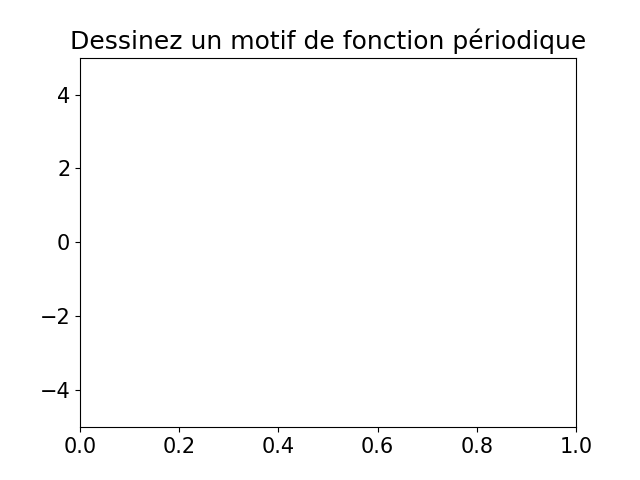

In [20]:


# Create a figure and axis
fig, ax = plt.subplots()
ax.set_title('Dessinez un motif de fonction périodique')
ax.set_xlim(0, 1)
ax.set_ylim(-5, 5)

# List to store the coordinates
coords = []

# Function to handle the lasso selector
def onselect(verts):
    path = Path(verts)
    coords.extend(verts)
    ax.plot(*zip(*verts), marker='o', color='r')
    fig.canvas.draw()

# Create the lasso selector
lasso = LassoSelector(ax, onselect)

plt.show()

# Print the coordinates
#print("Coordinates of the drawn curve:")
#print(coords)

In [21]:
print("Entrez la valeur que vous souhaitez pour la fréquence (en Hertz) de votre fonction périodique, puis appuyez sur entrée")
freq=float(input())

Entrez la valeur que vous souhaitez pour la fréquence (en Hertz) de votre fonction périodique, puis appuyez sur entrée


 314


Puis on va interpoler ce motif, le "lisser" histoire qu'il aie de meilleures propriétés mathématiques.

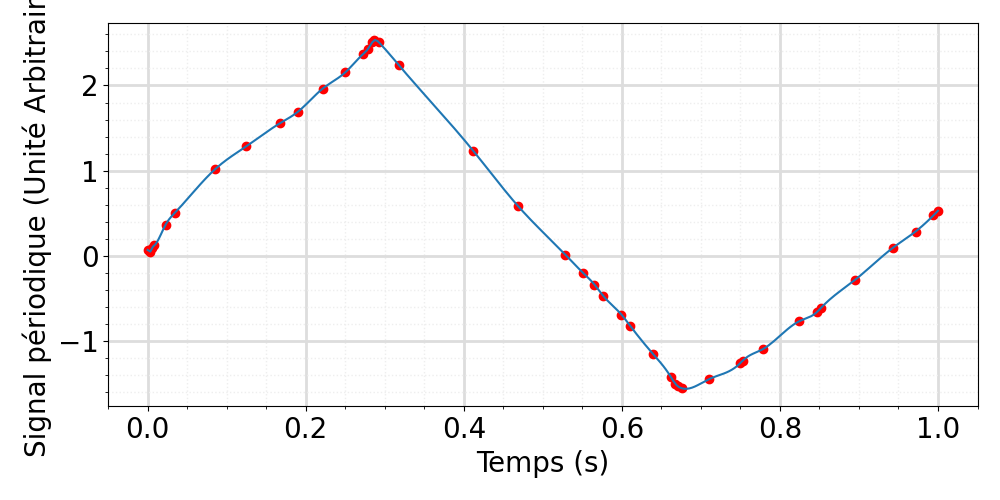

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

#print(freq)
#print(coords)

valeur_min_xi = min(coords, key=lambda t: t[0])
valeur_max_xi = max(coords, key=lambda t: t[0])
# Trouve l'indice i du minimum des xi
indice_min_xi = coords.index(valeur_min_xi)
indice_max_xi = coords.index(valeur_max_xi)


coords = sorted(coords, key=lambda couple: couple[0])


coords = [((i[0]-valeur_min_xi[0])/(valeur_max_xi[0]-valeur_min_xi[0]),i[1]) for i in coords] #bijection de xmin xmax vers 0,1 et (bouclage continu de ymin ymax ) --> moins intuitif possiblement lorsqu'on découvre la notion
#print(coords)

# Your data points
data = coords
x, y = zip(*data)  # Separate x and y values

# Remove duplicate x values
unique_x, unique_y = [], []
for xi, yi in zip(x, y):
    if xi not in unique_x:
        unique_x.append(xi)
        unique_y.append(yi)

# Create a smoother curve
xnew = np.linspace(min(unique_x), max(unique_x), 300)  # Generate new x values
spl = make_interp_spline(unique_x, unique_y, k=3)  # Use cubic spline interpolation (k=3)
y_smooth = spl(xnew)




fig,ax = plt.subplots(figsize=(10,5))



ax.set_xlabel(r"Temps (s)",fontsize=20)
ax.set_ylabel(r"Signal périodique (Unité Arbitraire)",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)




#Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=2)
#Show the minor grid as well. Style it in very light gray as a thin,
#dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1)
#Make the minor ticks and gridlines show.
ax.minorticks_on()
ax.set_axisbelow(True) 
#ax.legend(fontsize=40)


        
nbT = 4
coordplot = [(coords[k%len(coords)][0]/freq+k//len(coords) /freq,coords[k%len(coords)][1]) for k in range(4*len(coords))]
#time = np.linspace(0,nbT/freq,len(coordplot))
#fp =  np.linspace(0,5000,100)

# Plot the original data points and the interpolated curve
ax.scatter(unique_x, unique_y, label='Original data', color='red')
ax.plot(xnew, y_smooth, label='Spline Interpolation')

#ax.plot(fech,-f-k*fech, linestyle= 'solid',linewidth=1,label = r"f' = -f-fe".format(k))

#ax.set_ylim([0,np.max(f+2*fech[-1])])
#ax.set_ylim([-2,105])

#ax.scatter(f_list*f0,Z0*np.asarray(Z_list)*1e-6, color = 'blue', marker = '+',s=50,label="valeurs expérimentales")
#ax.legend(loc='upper left', fontsize=15)
plt.tight_layout()

plt.show()





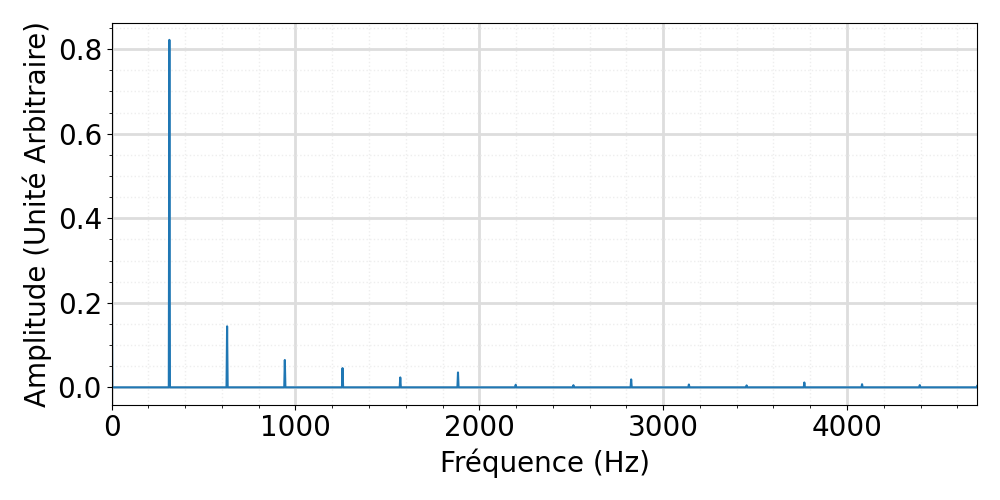

In [23]:
from scipy.fft import fft, fftfreq, fftshift
import numpy as np

# Your list of (x, y) points

nbT = 100
TFmashup=[(xnew[i],y_smooth[i]) for i in range(len(xnew))]
coordfourier = [(TFmashup[k%len(TFmashup)][0]/freq+k//len(TFmashup) /freq,TFmashup[k%len(TFmashup)][1]) for k in range(nbT *len(TFmashup))]
#time = np.linspace(0,nbT/freq,len(coordplot))
points = coordfourier

# Define the sample spacing (T) if known
T = xnew[-1]/(freq*len(xnew))  # Replace with your actual sample spacing

x = np.array([x for x, _ in points])
y = np.array([y for _, y in points])

yf = fft(y)
xf = fftfreq(len(points), T)
xf = fftshift(xf)
yplot = fftshift(yf)



fig,ax = plt.subplots(figsize=(10,5))


ax.set_xlabel(r"Fréquence (Hz)",fontsize=20)
ax.set_ylabel(r"Amplitude (Unité Arbitraire)",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)


ax.grid(which='major', color='#DDDDDD', linewidth=2)

ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1)

ax.minorticks_on()
ax.set_axisbelow(True) 


ax.plot(xf, 1.0 / len(points) * np.abs(yplot))


ax.set_xlim([0,15*freq])


plt.tight_layout()

plt.show()


In [29]:
plt.rcParams.update({'font.size': 15})
#locale.setlocale(locale.LC_ALL, '')
plt.rcParams['axes.formatter.use_locale'] = False






def f(freq_ech):
    
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(12,6))

    xnew = np.linspace(min(unique_x), max(unique_x), 300)  # Generate new x values
    spl = make_interp_spline(unique_x, unique_y, k=3)  # Use cubic spline interpolation (k=3)
    y_smooth = spl(xnew)
    
    
    
    axs[0].set_xlabel(r"Temps (s)",fontsize=20)
    axs[0].set_ylabel(r"Signal périodique (Unité Arbitraire)",fontsize=20)
    axs[0].tick_params(axis='both', which='major', labelsize=20)
    axs[0].tick_params(axis='both', which='minor', labelsize=20)
    
    
    
    
    #Show the major grid and style it slightly.
    axs[0].grid(which='major', color='#DDDDDD', linewidth=2)
    #Show the minor grid as well. Style it in very light gray as a thin,
    #dotted line.
    axs[0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1)
    #Make the minor ticks and gridlines show.
    axs[0].minorticks_on()
    axs[0].set_axisbelow(True) 

    tempplot=[(xnew[i],y_smooth[i])for i in range(len(xnew))]    
    nbT = 4
    coordsubplot = [(tempplot[k%len(tempplot)][0]/freq+k//len(tempplot) /freq,tempplot[k%len(tempplot)][1]) for k in range(nbT*len(tempplot))]

    coordsubech=[]
    Nadd = int(coordsubplot[-1][0]//(1/freq_ech))
   
    for i in range(Nadd):
        for k in range(len(coordsubplot)):
            if coordsubplot[k][0]-i/freq_ech > 0:
                indice_xi_sup_0 = k
                break
        coordsubech.append(coordsubplot[indice_xi_sup_0])
    
    #coordsubech.append(coordsubplot[int((i)*len(coordsubplot)/Nadd)])

    ##########################
    
    #axs[0].scatter([coordsubplot[i][0] for i in range(len(coordsubplot)) if int(coordsubplot[i][0]*freq_ech)%1==0], [coordsubplot[i][1] for i in range(len(coordsubplot)) if int(coordsubplot[i][0]*freq_ech)%1==0], label='Échantillonnage', color='red')
    axs[0].scatter([i[0] for i in coordsubech], [i[1] for i in coordsubech], label='Signal échantillonné', color='red')
    axs[0].plot([i[0] for i in coordsubplot], [i[1] for i in coordsubplot], label='Signal réel')
    axs[0].legend(loc = 'upper right')
   
    

    axs[0].set_ylabel("Amplitude (U.A.)")
    axs[0].set_xlabel("Temps (s)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[0].set_title("Enregistrement")



    nbT = 100
    TFmashup=[(xnew[i],y_smooth[i]) for i in range(len(xnew))]
    coordfourier = [(TFmashup[k%len(TFmashup)][0]/freq+k//len(TFmashup) /freq,TFmashup[k%len(TFmashup)][1]) for k in range(nbT *len(TFmashup))]
    #time = np.linspace(0,nbT/freq,len(coordplot))
    points = coordfourier
    
    # Define the sample spacing (T) if known
    T = xnew[-1]/(freq*len(xnew))  # Replace with your actual sample spacing
    
    x = np.array([x for x, _ in points])
    y = np.array([y for _, y in points])
    
    yf = fft(y)
    xf = fftfreq(len(points), T)
    xf = fftshift(xf)
    yplot = fftshift(yf)
    axs[1].plot(xf, 1.0 / len(points) * np.abs(yplot),alpha=0.5,label="spectre signal initial")
    axs[1].set_xlim([0,15*freq])


    nbT = 100
    TFmashup=[(xnew[i],y_smooth[i]) for i in range(len(xnew))]

    
    
    coordfourier = [(TFmashup[k%len(TFmashup)][0]/freq+k//len(TFmashup) /freq,TFmashup[k%len(TFmashup)][1]) for k in range(nbT *len(TFmashup))]
    #time = np.linspace(0,nbT/freq,len(coordplot))
    """
    coordsubech2=[]
    Nadd2 = int(coordfourier[-1][0]//(1/freq_ech))
   
    for i in range(Nadd2):
        coordsubech2.append(coordfourier[int((i)*len(coordfourier)/Nadd2)])"""

    
    coordsubech2=[]
    Nadd2 = int(coordfourier[-1][0]//(1/freq_ech))
   
    for i in range(Nadd2):
        for k in range(max([0,int((i-0.5)*len(coordfourier)/Nadd2)]),len(coordfourier)):
            if coordfourier[k][0]-i/freq_ech > 0:
                indice_xi_sup_0 = k
                break
        coordsubech2.append(coordfourier[indice_xi_sup_0])

    
    points2 = coordsubech2
    
    # Define the sample spacing (T) if known
    #T2 = coordsubech2[1][0]-coordsubech2[0][0]  # Replace with your actual sample spacing
    T2 = 1/freq_ech  # Replace with your actual sample spacing
    
    x2 = np.array([xi for xi, _ in points2])
    y2 = np.array([yi for _, yi in points2])
    
    yf2 = fft(y2)
    xf2 = fftfreq(len(points2), T2)
    xf2 = fftshift(xf2)
    yplot2 = fftshift(yf2)
    axs[1].plot(xf2, 1.0 / len(points2) * np.abs(yplot2),alpha=0.5,label="spectre signal échantillonné")
    axs[1].set_xlim([0,15*freq])
    
    #axs[1].set_xlim((0,1200))





    axs[1].set_ylabel("Amplitude (U.A.)")
    axs[1].set_xlabel("Fréquence (Hz)")
    #axs[0, 0].set_title("Enregistrement d'une onde sonore de fréquence f = {} Hz".format(round(freq,1)))
    axs[1].set_title("Spectre")
    #itx = np.fft.ifft(tx);
    axs[1].grid(which='major', color='#DDDDDD', linewidth=3)

    axs[1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=1.5)

    axs[1].minorticks_on()

    plt.legend(loc = 'upper right')
    plt.show()

    return 

#actualisation de la barre d'actualisation dynamique
interactive_plot = interact(f, freq_ech=(int(freq/4), int(freq/4)*100,int(freq/4)))

interactive(children=(IntSlider(value=3900, description='freq_ech', max=7800, min=78, step=78), Output()), _do…

On remarque que le spectre du signal échantillonné commence à se distinguer du spectre du signal initial à des fréquences d'échantillonnages bien plus élevées que le double de la fréquence fondamentale. À votre avis, la fréquence fondamentale est-elle si pertinente ici pour définir la fréquence d'échantillonnage minimale?